In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\amitk\OneDrive\Desktop\customer_churn_prediction\data\telco.csv")
df.head()



,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [ ]:
#understaning data with help of eda 
df.info()
df.describe()
df.isnull().sum()
df.nunique()


In [3]:
df.columns = df.columns.str.strip()      # remove spaces  those column have space between them like Churn Score to Churn_Score
df.columns = df.columns.str.replace(" ", "_")   # optional cleanup
df.columns=df.columns.str.lower()


In [4]:
# df['Churn'].value_counts(normalize=True)
df.columns
# df['Churn Score'].value_counts(normalize=True)

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'country', 'state', 'city',
       'zip_code', 'latitude', 'longitude', 'population', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'customer_status', 'churn_label',
       'churn_score', 'cltv', 'churn_category', 'churn_reason'],
      dtype='object')

In [5]:
target_col='churn_score'

In [6]:
leakage_cols = [
    'customer_status', 'churn_label', 'cltv', 'churn_category', 'churn_reason'
]

# Drop only those columns that actually exist
df = df.drop(columns=[col for col in leakage_cols if col in df.columns], errors='ignore')


In [7]:
df.head()

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,...,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_score
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,91
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,69
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,81
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,88
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,67


In [8]:
target_col='churn_score'

In [9]:
print(df.columns.to_list())

['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married', 'dependents', 'number_of_dependents', 'country', 'state', 'city', 'zip_code', 'latitude', 'longitude', 'population', 'quarter', 'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'churn_score']


In [10]:
# separate numeric and categorical features
target_col = 'churn_score'

categorical_cols = df.select_dtypes(include="object").drop(target_col, axis=1, errors='ignore').columns
numeric_cols = df.select_dtypes(exclude="object").drop(target_col, axis=1, errors='ignore').columns



In [11]:
import pandas as pd
import numpy as np

df['charges_per_month'] = df['total_charges'] / (df['tenure_in_months'] + 1)

df['refund_ratio'] = df['total_refunds'] / (df['total_charges'] + 1)

df['extra_data_ratio'] = df['total_extra_data_charges'] / (df['monthly_charge'] + 1)

df['long_distance_ratio'] = df['total_long_distance_charges'] / (df['total_revenue'] + 1)

df['revenue_per_month'] = df['total_revenue'] / (df['tenure_in_months'] + 1)

df['is_low_satisfaction'] = (df['satisfaction_score'] <= 3).astype(int)

df['tenure_bucket'] = pd.cut(
    df['tenure_in_months'],
    bins=[0, 6, 12, 24, 48, 72, 1000],
    labels=['0–6m', '6–12m', '1–2y', '2–4y', '4–6y', '6y+']
)

df['high_usage'] = (df['avg_monthly_gb_download'] > df['avg_monthly_gb_download'].median()).astype(int)

df['streaming_services_count'] = (
    df[['streaming_tv', 'streaming_movies', 'streaming_music']] == 'Yes'
).sum(axis=1)

df['security_products_count'] = (
    df[['online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support']] == 'Yes'
).sum(axis=1)


In [ ]:
df.columns.to_list()

In [ ]:
df.columns.to_list()

In [14]:
# Ensure churn is numeric
if df['churn_score'].dtype == 'object':
    df['churn_score'] = df['churn_score'].map({'Yes': 1, 'No': 0})

# --- REDETECT columns AFTER feature engineering ---
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('churn_score')

print("Categorical columns:", len(cat_cols))
print("Numeric columns:", len(num_cols))

# --- FIX CATEGORICAL COLUMNS SAFELY ---
# Step 1: Convert categories → string to avoid category restrictions
df[cat_cols] = df[cat_cols].astype(str)

# Step 2: Fill missing values
df[cat_cols] = df[cat_cols].replace(['nan', 'None', 'NaN'], 'Unknown')
df[cat_cols] = df[cat_cols].fillna('Unknown')

# --- FIX NUMERIC COLUMNS ---
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


Categorical columns: 28
Numeric columns: 26


In [17]:
#  training catboost model that is best for prediction
!pip install catboost

In [21]:
 #  define x and y before training
 target = 'churn_score'  # Change based on your dataset column name

X = df.drop(columns=[target])  # all features
y = df[target]
 

In [22]:
# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
df.columns.to_list()

In [25]:
print("Target unique values:", y_train.unique())
print("Count:", len(y_train.unique()))


Target unique values: [81 93 49 75 21 73 38 65 28 41 43 36 55 20 60 30 44 90 91 26 89 70 33 53
 24 50 63 34 67 39 96 74 31 56 57 77 78 37 62 59 23 32 48 92 52 69 79 42
 54 29 71 58 61 76 22 51 45 95 66 25 64 85 86 27 46 88 87 68 84 82 72 40
 35 83 80 47 94  9  8  7]
Count: 80


In [26]:
from catboost import CatBoostRegressor

cat_features = np.where(X.dtypes == 'object')[0]

model = CatBoostRegressor(
    iterations=700,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=False
)

model.fit(X_train, y_train, cat_features=cat_features)


In [27]:
from sklearn.metrics import r2_score, mean_squared_error

preds = model.predict(X_test)
print("R2 Score:", r2_score(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))


R2 Score: 0.3624543547382215
RMSE: 17.004258734063164


c:\Users\amitk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
import pandas as pd
import numpy as np


# -------------------------
# 1️⃣  Convert churn_score → 3 classes
# -------------------------
df['churn_class'] = pd.qcut(df['churn_score'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df.drop(['churn_score', 'churn_class'], axis=1)
y = df['churn_class']


# -------------------------
# 2️⃣ Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Detect categorical columns
cat_features = np.where(X.dtypes == 'object')[0]


# -------------------------
# 3️⃣ Train CatBoost Multi-Class Model
# -------------------------
model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=8,
    loss_function='MultiClass',
    auto_class_weights='Balanced',
    verbose=False
)

model.fit(X_train, y_train, cat_features=cat_features)


# -------------------------
# 4️⃣ Evaluate Model
# -------------------------
preds = model.predict(X_test)
preds = preds.flatten()  # needed sometimes

print("\n📌 CatBoost Multi-Class Results:")
print("Accuracy:", accuracy_score(y_test, preds))
print("Macro F1 Score:", f1_score(y_test, preds, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, preds))



📌 CatBoost Multi-Class Results:
Accuracy: 0.5039034776437189
Macro F1 Score: 0.5105845160484144

Classification Report:
               precision    recall  f1-score   support

        High       0.76      0.63      0.69       456
         Low       0.43      0.55      0.48       471
      Medium       0.38      0.35      0.36       482

    accuracy                           0.50      1409
   macro avg       0.52      0.51      0.51      1409
weighted avg       0.52      0.50      0.51      1409



In [29]:
import joblib
joblib.dump(model, "final_churn_multiclass.pkl")
print("Model saved as final_churn_multiclass.pkl")


Model saved as final_churn_multiclass.pkl


In [ ]:
feature_columns = X.columns.tolist()
print(len(feature_columns), feature_columns)


In [31]:
# creating a blank template row 
new_customer = pd.DataFrame(columns=feature_columns)


In [32]:
# fill values only for known columns
new_customer.loc[0] = 0  # temporary fill numeric default

new_customer.loc[0, 'gender'] = 'Female'
new_customer.loc[0, 'age'] = 30
new_customer.loc[0, 'contract'] = 'Month-to-Month'
new_customer.loc[0, 'payment_method'] = 'Credit Card'
new_customer.loc[0, 'internet_type'] = 'Fiber'


C:\Users\amitk\AppData\Local\Temp\ipykernel_135336\4214663405.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_customer.loc[0, 'gender'] = 'Female'
C:\Users\amitk\AppData\Local\Temp\ipykernel_135336\4214663405.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Month-to-Month' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_customer.loc[0, 'contract'] = 'Month-to-Month'
C:\Users\amitk\AppData\Local\Temp\ipykernel_135336\4214663405.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Credit Card' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_customer.

In [33]:
# handling missing values
# Get column names for categorical features
cat_feature_names = X.columns[cat_features].tolist()

# Handle missing values
# new_customer[cat_feature_names] = new_customer[cat_feature_names].fillna('Unknown')
# Fill categorical missing with "Unknown"
new_customer[cat_feature_names] = new_customer[cat_feature_names].fillna("Unknown")

# Fill numeric missing with median of training data
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
new_customer[num_cols] = new_customer[num_cols].fillna(X[num_cols].median())



In [34]:
def predict_customer(model, input_dict, X, cat_features):

    cat_feature_names = X.columns[cat_features].tolist()

    # Create row with exact dtypes from training data
    df = pd.DataFrame({col: pd.Series(dtype=X[col].dtype) for col in X.columns})
    df.loc[0] = pd.NA

    # Fill provided values
    for k, v in input_dict.items():
        if k in df.columns:
            df.at[0, k] = v

    # Fix missing values
    df[cat_feature_names] = df[cat_feature_names].fillna("Unknown")

    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    df[num_cols] = df[num_cols].fillna(X[num_cols].median())

    pred = model.predict(df)[0]
    prob = model.predict_proba(df)[0]

    return pred, prob


In [35]:
input_data = {
    "gender": "Female",
    "age": 30,
    "contract": "Month-to-Month",
    "payment_method": "Credit Card",
    "internet_type": "Fiber"
}

prediction, probabilities = predict_customer(model, input_data, X, cat_features)

print("\nPredicted Class:", prediction)
print("Probabilities:", probabilities)



Predicted Class: ['High']
Probabilities: [0.38917023 0.37869069 0.23213907]


C:\Users\amitk\AppData\Local\Temp\ipykernel_135336\3733315901.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[num_cols] = df[num_cols].fillna(X[num_cols].median())


In [36]:
import joblib
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

class ChurnPipeline:
    def __init__(self, model, X, cat_features):
        self.model = model
        self.columns = X.columns.tolist()
        self.cat_features = X.columns[cat_features].tolist()
        self.numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
        self.medians = X[self.numeric_features].median()

    def preprocess(self, input_dict):
        df = pd.DataFrame({col: pd.Series([], dtype="object") for col in self.columns})
        df.loc[0] = None

        for k, v in input_dict.items():
            if k in df.columns:
                df.at[0, k] = v

        df[self.cat_features] = df[self.cat_features].fillna("Unknown")
        df[self.numeric_features] = df[self.numeric_features].fillna(self.medians)

        return df

    def predict(self, data):
        df = self.preprocess(data)
        prediction = self.model.predict(df)[0]
        probability = self.model.predict_proba(df)[0]
        return prediction, probability


# Save
pipeline = ChurnPipeline(model, X, cat_features)
joblib.dump(pipeline, "final_churn_pipeline.pkl")

print("✅ Pipeline saved!")


✅ Pipeline saved!


In [ ]:
# use existing dataset as test dataset
sample = df.sample(20, random_state=42)
for _, row in sample.iterrows():
    pred, prob = pipeline.predict(row.to_dict())
    print(row['customer_id'], "→", pred, prob)


In [ ]:
import joblib
import pandas as pd

pipeline = joblib.load("final_churn_pipeline.pkl")

df = pd.read_csv("C:\\Users\\amitk\\OneDrive\\Desktop\\customer_churn_prediction\\data\\telco.csv")

results = []

for _, row in df.iterrows():
    pred, prob = pipeline.predict(row.to_dict())
    results.append([pred, prob])

df['Predicted_Class'] = [r[0] for r in results]
df['Probabilities'] = [str(r[1]) for r in results]

df.to_csv("predicted_output.csv", index=False)
print("📁 Results saved to predicted_output.csv")


In [42]:
# Evaluate confusion metrics
from sklearn.metrics import confusion_matrix, classification_report

print("\nClassification Report After Threshold Tuning:\n")
print(classification_report(y_test, final_preds))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_preds))



Classification Report After Threshold Tuning:



NameError: name 'final_preds' is not defined

In [99]:
# model and stake holders
import pandas as pd

fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

fi.head(20)


,Feature,Importance
42,satisfaction_score,17.585484
9,city,6.325189
13,population,5.284446
10,zip_code,4.269079
1,age,4.210804
18,offer,3.858474
11,latitude,3.782079
33,contract,3.746975
12,longitude,3.643446
20,avg_monthly_long_distance_charges,3.553177


In [93]:
#  convert target to binary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])


In [94]:
#  train test split
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [95]:
# build final training pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
pipeline=Pipeline([("prep", ColumnTransformer([
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])),
    ("model", XGBClassifier(n_estimators=200, learning_rate=0.1, eval_metric="logloss"))])

In [96]:
# step 8: Evaluate
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
pipeline.fit(X_train,y_train)
preds = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, probs))
print(classification_report(y_test, preds))


Accuracy: 0.6252661462029808
ROC-AUC: 0.6937159151042829
              precision    recall  f1-score   support

           0       0.47      0.37      0.41       507
           1       0.68      0.77      0.72       902

    accuracy                           0.63      1409
   macro avg       0.58      0.57      0.57      1409
weighted avg       0.61      0.63      0.61      1409



In [ ]:
# model is detecting churner good  but it clasifying mischurner and churners
# Dataset is imbalanced
 
# these are reasones that why model is not giving correct result 
# Model is not tuned

# Features may need scaling or feature engineering

In [76]:
df['churn'].value_counts(normalize=True)


churn
1    0.640352
0    0.359648
Name: proportion, dtype: float64

In [77]:
# apply class wighting or sampling
model = LogisticRegression(class_weight='balanced', max_iter=2000)


In [80]:
# comparing models 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = pipeline.named_steps["prep"]

# XGBoost pipeline
xgb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    ))
])

# train
xgb_pipeline.fit(X_train, y_train)

# predict
preds = xgb_pipeline.predict(X_test)
probs = xgb_pipeline.predict_proba(X_test)[:,1]

# evaluation
print("\n⭐ XGBoost Model Results ⭐")
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, probs))
print("\nClassification Report:\n", classification_report(y_test, preds))



⭐ XGBoost Model Results ⭐
Accuracy: 0.6352022711142654
ROC-AUC: 0.7034530386740332

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.40      0.44       504
           1       0.70      0.77      0.73       905

    accuracy                           0.64      1409
   macro avg       0.59      0.58      0.58      1409
weighted avg       0.62      0.64      0.63      1409



In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, 
        class_weight='balanced',
        max_depth=10
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    )
}

results = {}

for name, model in models.items():
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    probs = pipe.predict_proba(X_test)[:,1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, probs),
        "F1 Score": f1_score(y_test, preds)
    }

# Display comparison
import pandas as pd
comparison_df = pd.DataFrame(results).T
print("\n📊 Model Comparison:\n")
print(comparison_df.sort_values("ROC-AUC", ascending=False))



📊 Model Comparison:

                     Accuracy   ROC-AUC  F1 Score
XGBoost              0.634493  0.715777  0.727657
Random Forest        0.634493  0.708469  0.691432
Logistic Regression  0.626686  0.693443  0.689492


In [83]:
df.columns.to_list()

['gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'number_of_dependents',
 'country',
 'state',
 'city',
 'zip_code',
 'latitude',
 'longitude',
 'population',
 'quarter',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'satisfaction_score',
 'churn']

In [100]:
# smote + tomek links
from imblearn.combine import SMOTETomek

resampler = SMOTETomek()


In [101]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [102]:
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight  # <-- important
)


In [105]:
#  tune threshold using precision recall curve
from sklearn.metrics import precision_recall_curve

probs = xgb_pipeline.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# choose best threshold where precision improves without losing much recall
best_index = (precision - recall).argmax()  # or custom logic
if best_index >=len(thresholds):
    best_index=len(thresholds)-1
best_threshold=thresholds[best_index]
print("Best Threshold:", best_threshold)

Best Threshold: 0.99982077


In [106]:
final_preds = (probs >= best_threshold).astype(int)


In [107]:
# rechecking model
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, final_preds))
print(classification_report(y_test, final_preds))


[[507   0]
 [901   1]]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53       507
           1       1.00      0.00      0.00       902

    accuracy                           0.36      1409
   macro avg       0.68      0.50      0.27      1409
weighted avg       0.77      0.36      0.19      1409



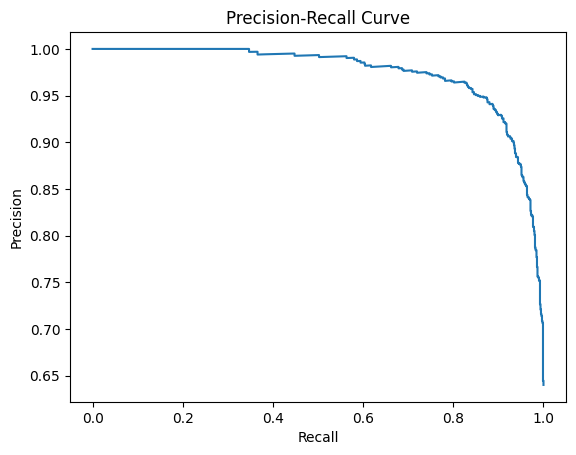

In [108]:
import matplotlib.pyplot as plt

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [109]:
# pick threshold based on buisness requirement
import numpy as np

targets = [
   (p, r, t) for p, r, t in zip(precision, recall, thresholds)
   if r >= 0.85 and p >= 0.50
]

best = max(targets, key=lambda x: x[0])  # maximize precision
best_threshold = best[2]
print("Balanced Threshold:", best_threshold)


Balanced Threshold: 0.5995546


In [110]:
final_preds = (probs >= best_threshold).astype(int)


In [111]:
# rechecking model
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, final_preds))
print(classification_report(y_test, final_preds))


[[468  39]
 [135 767]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       507
           1       0.95      0.85      0.90       902

    accuracy                           0.88      1409
   macro avg       0.86      0.89      0.87      1409
weighted avg       0.89      0.88      0.88      1409



In [ ]:
# s

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor), 
    ('resample', SMOTETomek()),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss"
    ))
])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'number_of_dependents', 'zip_code', 'latitude', 'longitude',
       'population', 'number_of_referrals', 'tenure_in_months',
       'avg_monthly_long_distance_charges', 'avg_monthly_gb_download',
       'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [116]:
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'number_of_dependents', 'zip_code', 'latitude', 'longitude',
       'population', 'number_of_referrals', 'tenure_in_months',
       'avg_monthly_long_distance_charges', 'avg_monthly_gb_download',
       'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [117]:
# predict churn probabilities
probs = final_pipeline.predict_proba(X_test)[:,1]

In [119]:
import joblib

joblib.dump({
    "model": final_pipeline,
    "threshold": best_threshold
}, "final_churn_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [120]:
import joblib

joblib.dump({
    "model": final_pipeline,
    "threshold": 0.59
}, "final_churn_model.pkl")

print("Model saved as final_churn_model.pkl")


Model saved as final_churn_model.pkl


In [121]:
# prediction function using sabved model
def predict_customer(dataframe):
    saved = joblib.load("final_churn_model.pkl")
    model = saved["model"]
    threshold = saved["threshold"]
    
    prob = model.predict_proba(dataframe)[:,1]
    prediction = (prob >= threshold).astype(int)
    
    return prediction, prob


In [ ]:
!pip install shap

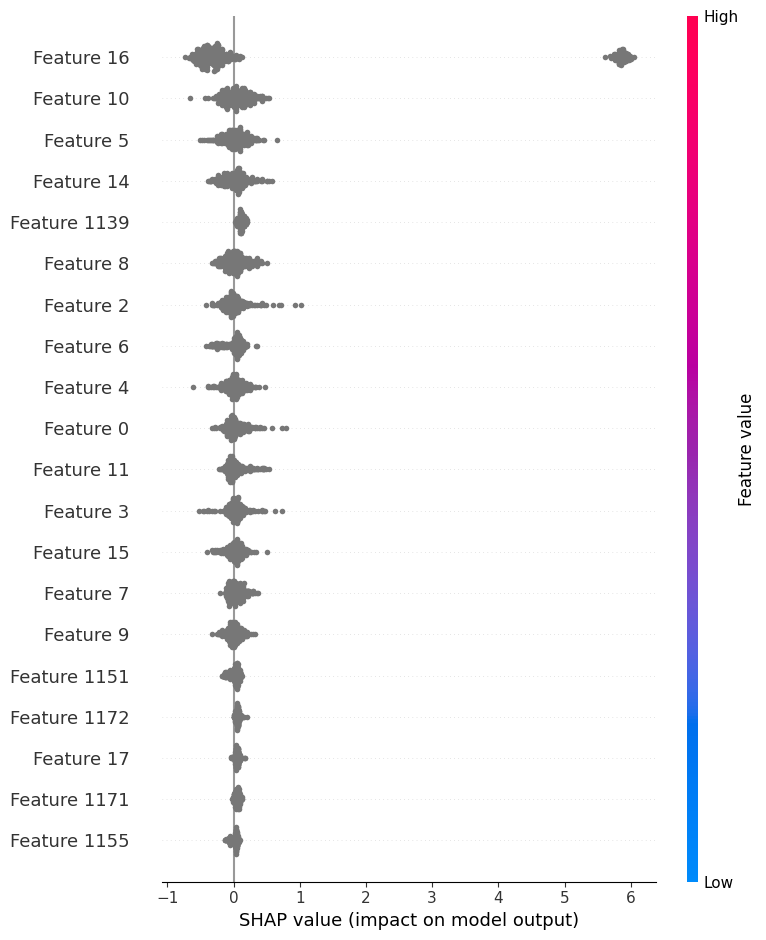

In [192]:
# adding explanability to existing model
import shap

model = final_pipeline.named_steps["model"]
preprocessor = final_pipeline.named_steps["preprocessor"]

X_sample = X_train.sample(300, random_state=42)
X_processed = preprocessor.transform(X_sample)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_processed)

shap.summary_plot(shap_values, X_processed)



In [191]:
# build shap model using  fast api
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

app = FastAPI(title="Churn Prediction API")

artifact = joblib.load("final_churn_model.pkl")
pipeline = artifact["model"]
threshold = artifact["threshold"]

class Customer(BaseModel):
    data: dict

@app.post("/predict")
def predict(customer: Customer):
    df = pd.DataFrame([customer.data])
    prob = pipeline.predict_proba(df)[:,1][0]
    pred = int(prob >= threshold)
    
    return {"churn_probability": float(prob), "prediction": pred}


FileNotFoundError: [Errno 2] No such file or directory: 'final_churn_model.pkl'

In [ ]:
import streamlit as st
import pandas as pd
import joblib

stored = joblib.load("final_churn_model.pkl")
pipeline = stored["model"]
threshold = stored["threshold"]

st.title("Customer Churn Prediction App")

file = st.file_uploader("Upload CSV")
if file:
    df = pd.read_csv(file)
    probs = pipeline.predict_proba(df)[:,1]
    preds = (probs >= threshold).astype(int)
    
    df["Churn Probability"] = probs
    df["Prediction"] = preds
    st.write(df)
